In [125]:
import pandas as pd
import numpy as np

df = pd.read_csv("mimic_combined_data.csv")

In [126]:
df = df.drop(["discharge_location","admission_type","admission_location",'hadm_id'],axis=1)

In [127]:
df

,dicom_id,subject_id,cxr_notes,insurance,language,marital_status,race,hospital_expire_flag,age,gender,...,pred_1,label_1,pred_2,label_2,pred_3,label_3,pred_4,label_4,pred_5,label_5
0,c6831b8b-228c9377-c9128fb3-cb86ad19-2711f92c,11536384,FINAL REPORT\...,Other,ENGLISH,SINGLE,WHITE,0,67,F,...,0.613055,1,0.004904,0,0.017526,0,0.239813,1,0.208361,0
1,03614fed-57234273-95c2ea50-736ec07e-52f157aa,16255488,FINAL ADDENDU...,Other,ENGLISH,MARRIED,WHITE,0,73,M,...,0.001927,0,0.000162,0,0.004231,0,0.044018,0,0.889583,1
2,855cf3df-cafe21b6-a760b25d-d7f4ec79-2f21c671,16255488,FINAL ADDENDU...,Other,ENGLISH,MARRIED,WHITE,0,73,M,...,0.007987,0,0.006164,0,0.005805,0,0.077657,0,0.742022,1
3,0b02121c-4efc9b2b-5c4dd29d-fc05f3bd-ebc35f0f,16651008,FINAL REPORT\...,Other,ENGLISH,SINGLE,HISPANIC/LATINO - PUERTO RICAN,0,40,F,...,0.128788,0,0.109511,1,0.004195,0,0.219196,0,0.223832,0
4,0b02121c-4efc9b2b-5c4dd29d-fc05f3bd-ebc35f0f,16651008,FINAL REPORT\...,Medicaid,ENGLISH,SINGLE,HISPANIC/LATINO - PUERTO RICAN,0,40,F,...,0.128788,0,0.109511,1,0.004195,0,0.219196,0,0.223832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419729,ac5ce1b0-4a55097a-8a6af920-7d33e77a-da4558ef,11725311,FINAL REPORT\...,Medicare,ENGLISH,MARRIED,WHITE,0,71,F,...,0.808122,1,0.066776,0,0.012140,0,0.460908,0,0.045116,0
419730,ac5ce1b0-4a55097a-8a6af920-7d33e77a-da4558ef,11725311,FINAL REPORT\...,Medicare,ENGLISH,MARRIED,WHITE,0,71,F,...,0.808122,1,0.066776,0,0.012140,0,0.460908,0,0.045116,0
419731,a0fadaeb-c7e20ee7-202e7075-32342a0c-c979a822,18414079,FINAL REPORT\...,Other,ENGLISH,MARRIED,BLACK/AFRICAN,0,58,M,...,0.029151,0,0.015789,0,0.011479,0,0.176933,0,0.477054,1
419732,a2a1131f-4e8fa4be-3baecf3a-572e72e3-9365939f,18414079,FINAL REPORT\...,Other,ENGLISH,MARRIED,BLACK/AFRICAN,0,58,M,...,0.007882,0,0.002355,0,0.020277,0,0.034226,0,0.744954,1


In [128]:
df_cleaned = df.drop_duplicates()

In [129]:
df_cleaned = df_cleaned.drop('hadm_id')

KeyError: "['hadm_id'] not found in axis"

In [130]:
def combine_insurance(insurances):
    # Convert Series to a list for easier manipulation
    insurance_list = list(insurances)
    # If 'Other' is present but not the only value, return the non-'Other' value
    if 'Other' in insurance_list and len(set(insurance_list)) > 1:
        return next((i for i in insurance_list if i != 'Other'), 'Other')
    return insurance_list[0]

# Combine rows by dicom_id
combined_df = df_cleaned.groupby('dicom_id').agg({
    'subject_id': 'first',
    'cxr_notes': lambda x: ' '.join(x.unique()),  # Join unique cxr_notes
    'insurance': combine_insurance,
    'language': 'first',
    'marital_status': 'first',
    'race': 'first',
    'hospital_expire_flag': 'first',
    'age': 'first',
    'gender': 'first',
    'pred_0': 'mean',
    'label_0': 'first',
    'pred_1': 'mean',
    'label_1': 'first',
    'pred_2': 'mean',
    'label_2': 'first',
    'pred_3': 'mean',
    'label_3': 'first',
    'pred_4': 'mean',
    'label_4': 'first',
    'pred_5': 'mean',
    'label_5': 'first'
}).reset_index()

# Display the combined DataFrame
print(combined_df)


                                           dicom_id  subject_id  \
0      00010785-aefa6d86-8d00afab-09e76c6a-edb6b458    18778431   
1      0002ba95-e4325b54-a0e16b3b-3cf6c9d4-1b1c1910    18958209   
2      00039aac-942aea85-a4f7cd1c-faed6733-c8701b02    10900906   
3      0005ad61-eaa2d768-c8aff20f-dc56514a-47de997c    11888239   
4      0006a816-5140e307-815c7b9f-4856cbc6-670b7e6d    14533062   
...                                             ...         ...   
50221  fff85c15-2446d444-26d09a19-cab887d9-adec07c3    15283676   
50222  fffa7649-9dbf3371-c8083229-5e6906c0-24eac216    19512875   
50223  fffb28b4-1baa9271-538012ae-89dcdaab-a2d84281    16245569   
50224  fffd4d33-422d4d5b-7c09efc3-43832cf6-87c52a7f    16531888   
50225  fffea625-35edf956-eaea12bf-ee2df69d-750cac92    11443746   

                                               cxr_notes insurance language  \
0                                       FINAL REPORT\...  Medicare  ENGLISH   
1                                    

In [131]:
combined_df

,dicom_id,subject_id,cxr_notes,insurance,language,marital_status,race,hospital_expire_flag,age,gender,...,pred_1,label_1,pred_2,label_2,pred_3,label_3,pred_4,label_4,pred_5,label_5
0,00010785-aefa6d86-8d00afab-09e76c6a-edb6b458,18778431,FINAL REPORT\...,Medicare,ENGLISH,SINGLE,WHITE,0,70,M,...,0.006518,0,0.000579,0,0.001776,0,0.070622,0,0.919993,1
1,0002ba95-e4325b54-a0e16b3b-3cf6c9d4-1b1c1910,18958209,FINAL REPORT\...,Other,ENGLISH,MARRIED,WHITE,0,47,M,...,0.008693,0,0.002272,0,0.006564,0,0.198118,1,0.519948,0
2,00039aac-942aea85-a4f7cd1c-faed6733-c8701b02,10900906,FINAL REPORT\...,Other,ENGLISH,MARRIED,WHITE,0,46,M,...,0.010335,0,0.002279,0,0.003406,0,0.116132,1,0.743205,0
3,0005ad61-eaa2d768-c8aff20f-dc56514a-47de997c,11888239,FINAL REPORT\...,Medicare,?,WIDOWED,WHITE - RUSSIAN,0,88,F,...,0.450337,0,0.122760,0,0.019159,0,0.317923,0,0.194603,0
4,0006a816-5140e307-815c7b9f-4856cbc6-670b7e6d,14533062,FINAL REPORT\...,Medicare,ENGLISH,SINGLE,UNKNOWN,1,73,F,...,0.172460,1,0.013725,0,0.005869,0,0.274945,0,0.287542,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50221,fff85c15-2446d444-26d09a19-cab887d9-adec07c3,15283676,CLINICAL INFORMATION & QUESTIONS TO BE ANSWER...,Medicaid,ENGLISH,SINGLE,WHITE,0,63,M,...,0.207459,0,0.036986,0,0.009927,0,0.554218,0,0.123122,1
50222,fffa7649-9dbf3371-c8083229-5e6906c0-24eac216,19512875,FINAL REPORT\...,Medicare,ENGLISH,SINGLE,WHITE,0,72,M,...,0.034655,0,0.001166,0,0.006678,0,0.370409,1,0.274814,0
50223,fffb28b4-1baa9271-538012ae-89dcdaab-a2d84281,16245569,FINAL REPORT\...,Other,ENGLISH,WIDOWED,WHITE,0,88,F,...,0.731463,1,0.044125,0,0.008737,0,0.605399,0,0.025063,0
50224,fffd4d33-422d4d5b-7c09efc3-43832cf6-87c52a7f,16531888,FINAL REPORT\...,Medicaid,ENGLISH,SINGLE,BLACK/AFRICAN AMERICAN,0,43,M,...,0.001121,0,0.000026,0,0.000772,0,0.035011,0,0.964241,1


In [132]:
df = combined_df

In [133]:
for i in range(6):
    df[f'diff_{i}'] = np.abs(df[f'pred_{i}'] - df[f'label_{i}'])

df['avg_difference'] = df[[f'diff_{i}' for i in range(6)]].mean(axis=1)

threshold = df['avg_difference'].median()

df['classification'] = np.where(df['avg_difference'] <= threshold, 'high-scoring', 'low-scoring')

high_scoring_images = df[df['classification'] == 'high-scoring']
low_scoring_images = df[df['classification'] == 'low-scoring']

In [98]:
df.columns

Index(['dicom_id', 'subject_id', 'cxr_notes', 'insurance', 'language',
       'marital_status', 'race', 'hospital_expire_flag', 'age', 'gender',
       'pred_0', 'label_0', 'pred_1', 'label_1', 'pred_2', 'label_2', 'pred_3',
       'label_3', 'pred_4', 'label_4', 'pred_5', 'label_5', 'diff_0', 'diff_1',
       'diff_2', 'diff_3', 'diff_4', 'diff_5', 'avg_difference',
       'classification', 'age_section'],
      dtype='object')

In [144]:
import pandas as pd

# Assuming df is your DataFrame
bins = [0, 18, 30, 40, 50, 60, 70, 80, 100]  # Define age bins
labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['age_section'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df

,dicom_id,subject_id,cxr_notes,insurance,language,marital_status,race,hospital_expire_flag,age,gender,...,diff_0,diff_1,diff_2,diff_3,diff_4,diff_5,avg_difference,classification,pred_sum,age_section
0,00010785-aefa6d86-8d00afab-09e76c6a-edb6b458,18778431,FINAL REPORT\...,Medicare,ENGLISH,SINGLE,White,0,70,M,...,0.036442,0.006518,0.000579,0.001776,0.070622,0.080007,0.032657,high-scoring,1.035931,70-79
1,0002ba95-e4325b54-a0e16b3b-3cf6c9d4-1b1c1910,18958209,FINAL REPORT\...,Other,ENGLISH,MARRIED,White,0,47,M,...,0.895886,0.008693,0.002272,0.006564,0.801882,0.519948,0.372541,low-scoring,0.839709,40-49
2,00039aac-942aea85-a4f7cd1c-faed6733-c8701b02,10900906,FINAL REPORT\...,Other,ENGLISH,MARRIED,White,0,46,M,...,0.073242,0.010335,0.002279,0.003406,0.883868,0.743205,0.286056,low-scoring,0.948599,40-49
3,0005ad61-eaa2d768-c8aff20f-dc56514a-47de997c,11888239,FINAL REPORT\...,Medicare,?,WIDOWED,White,0,88,F,...,0.371582,0.450337,0.122760,0.019159,0.317923,0.194603,0.246061,low-scoring,1.476364,80+
4,0006a816-5140e307-815c7b9f-4856cbc6-670b7e6d,14533062,FINAL REPORT\...,Medicare,ENGLISH,SINGLE,Other,1,73,F,...,0.314317,0.827540,0.013725,0.005869,0.274945,0.287542,0.287323,low-scoring,1.068859,70-79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50221,fff85c15-2446d444-26d09a19-cab887d9-adec07c3,15283676,CLINICAL INFORMATION & QUESTIONS TO BE ANSWER...,Medicaid,ENGLISH,SINGLE,White,0,63,M,...,0.130908,0.207459,0.036986,0.009927,0.554218,0.876878,0.302729,low-scoring,1.062619,60-69
50222,fffa7649-9dbf3371-c8083229-5e6906c0-24eac216,19512875,FINAL REPORT\...,Medicare,ENGLISH,SINGLE,White,0,72,M,...,0.031670,0.034655,0.001166,0.006678,0.629591,0.274814,0.163096,high-scoring,0.719392,70-79
50223,fffb28b4-1baa9271-538012ae-89dcdaab-a2d84281,16245569,FINAL REPORT\...,Other,ENGLISH,WIDOWED,White,0,88,F,...,0.658828,0.268537,0.044125,0.008737,0.605399,0.025063,0.268448,low-scoring,2.073614,80+
50224,fffd4d33-422d4d5b-7c09efc3-43832cf6-87c52a7f,16531888,FINAL REPORT\...,Medicaid,ENGLISH,SINGLE,Black,0,43,M,...,0.013806,0.001121,0.000026,0.000772,0.035011,0.035759,0.014416,high-scoring,1.014977,40-49


In [100]:
len(df['dicom_id'].unique())

50226

In [135]:
race_mapping = {
    'WHITE': 'White',
    'WHITE - RUSSIAN': 'White',
    'WHITE - OTHER EUROPEAN': 'White',
    'PORTUGUESE': 'White',
    'WHITE - BRAZILIAN': 'White',
    'WHITE - EASTERN EUROPEAN': 'White',
    'BLACK/AFRICAN AMERICAN': 'Black',
    'BLACK/CAPE VERDEAN': 'Black',
    'BLACK/CARIBBEAN ISLAND': 'Black',
    'BLACK/AFRICAN': 'Black',
    'ASIAN - ASIAN INDIAN': 'Asian',
    'ASIAN - SOUTH EAST ASIAN': 'Asian',
    'ASIAN': 'Asian',
    'ASIAN - CHINESE': 'Asian',
    'ASIAN - KOREAN': 'Asian',
    'HISPANIC OR LATINO': 'Hispanic/Latino',
    'HISPANIC/LATINO - DOMINICAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - HONDURAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - GUATEMALAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - PUERTO RICAN': 'Hispanic/Latino',
    'SOUTH AMERICAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - CUBAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - COLUMBIAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - MEXICAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - SALVADORAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - CENTRAL AMERICAN': 'Hispanic/Latino',
    'OTHER': 'Other',
    'UNABLE TO OBTAIN': 'Other',
    'PATIENT DECLINED TO ANSWER': 'Other',
    'UNKNOWN': 'Other'
}

# Apply the mapping to the DataFrame
df['race'] = df['race'].map(race_mapping).fillna(df['race'])
df

,dicom_id,subject_id,cxr_notes,insurance,language,marital_status,race,hospital_expire_flag,age,gender,...,pred_5,label_5,diff_0,diff_1,diff_2,diff_3,diff_4,diff_5,avg_difference,classification
0,00010785-aefa6d86-8d00afab-09e76c6a-edb6b458,18778431,FINAL REPORT\...,Medicare,ENGLISH,SINGLE,White,0,70,M,...,0.919993,1,0.036442,0.006518,0.000579,0.001776,0.070622,0.080007,0.032657,high-scoring
1,0002ba95-e4325b54-a0e16b3b-3cf6c9d4-1b1c1910,18958209,FINAL REPORT\...,Other,ENGLISH,MARRIED,White,0,47,M,...,0.519948,0,0.895886,0.008693,0.002272,0.006564,0.801882,0.519948,0.372541,low-scoring
2,00039aac-942aea85-a4f7cd1c-faed6733-c8701b02,10900906,FINAL REPORT\...,Other,ENGLISH,MARRIED,White,0,46,M,...,0.743205,0,0.073242,0.010335,0.002279,0.003406,0.883868,0.743205,0.286056,low-scoring
3,0005ad61-eaa2d768-c8aff20f-dc56514a-47de997c,11888239,FINAL REPORT\...,Medicare,?,WIDOWED,White,0,88,F,...,0.194603,0,0.371582,0.450337,0.122760,0.019159,0.317923,0.194603,0.246061,low-scoring
4,0006a816-5140e307-815c7b9f-4856cbc6-670b7e6d,14533062,FINAL REPORT\...,Medicare,ENGLISH,SINGLE,Other,1,73,F,...,0.287542,0,0.314317,0.827540,0.013725,0.005869,0.274945,0.287542,0.287323,low-scoring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50221,fff85c15-2446d444-26d09a19-cab887d9-adec07c3,15283676,CLINICAL INFORMATION & QUESTIONS TO BE ANSWER...,Medicaid,ENGLISH,SINGLE,White,0,63,M,...,0.123122,1,0.130908,0.207459,0.036986,0.009927,0.554218,0.876878,0.302729,low-scoring
50222,fffa7649-9dbf3371-c8083229-5e6906c0-24eac216,19512875,FINAL REPORT\...,Medicare,ENGLISH,SINGLE,White,0,72,M,...,0.274814,0,0.031670,0.034655,0.001166,0.006678,0.629591,0.274814,0.163096,high-scoring
50223,fffb28b4-1baa9271-538012ae-89dcdaab-a2d84281,16245569,FINAL REPORT\...,Other,ENGLISH,WIDOWED,White,0,88,F,...,0.025063,0,0.658828,0.268537,0.044125,0.008737,0.605399,0.025063,0.268448,low-scoring
50224,fffd4d33-422d4d5b-7c09efc3-43832cf6-87c52a7f,16531888,FINAL REPORT\...,Medicaid,ENGLISH,SINGLE,Black,0,43,M,...,0.964241,1,0.013806,0.001121,0.000026,0.000772,0.035011,0.035759,0.014416,high-scoring


In [102]:
df_high = df[df['classification'] == 'high-scoring']
df_low = df[df['classification'] == 'low-scoring']


<Figure size 1200x800 with 0 Axes>

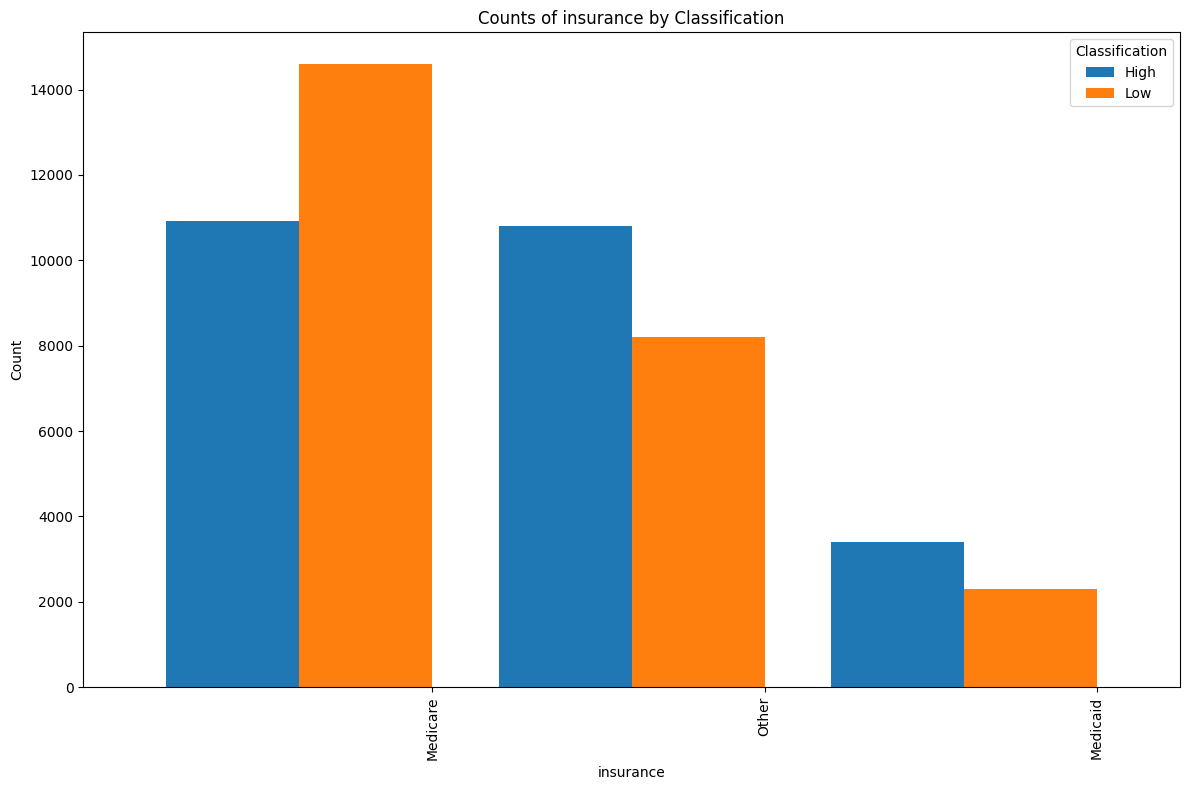

<Figure size 1200x800 with 0 Axes>

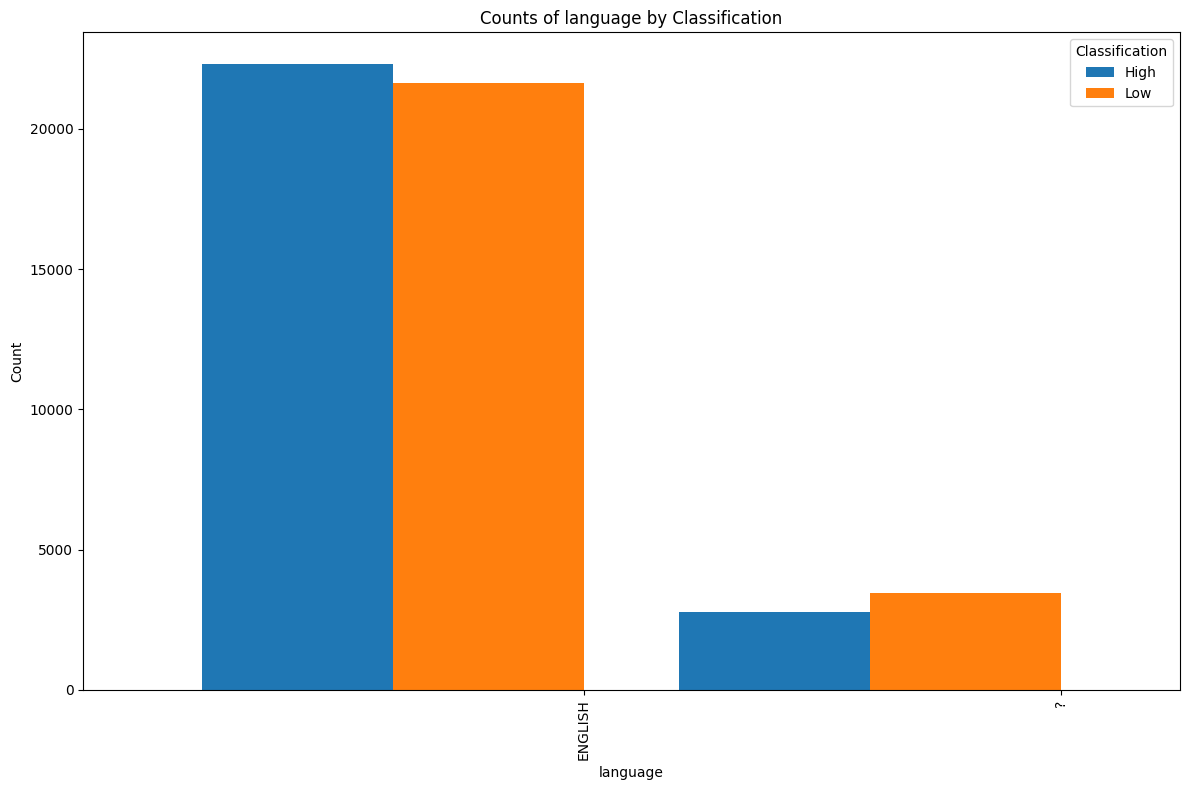

<Figure size 1200x800 with 0 Axes>

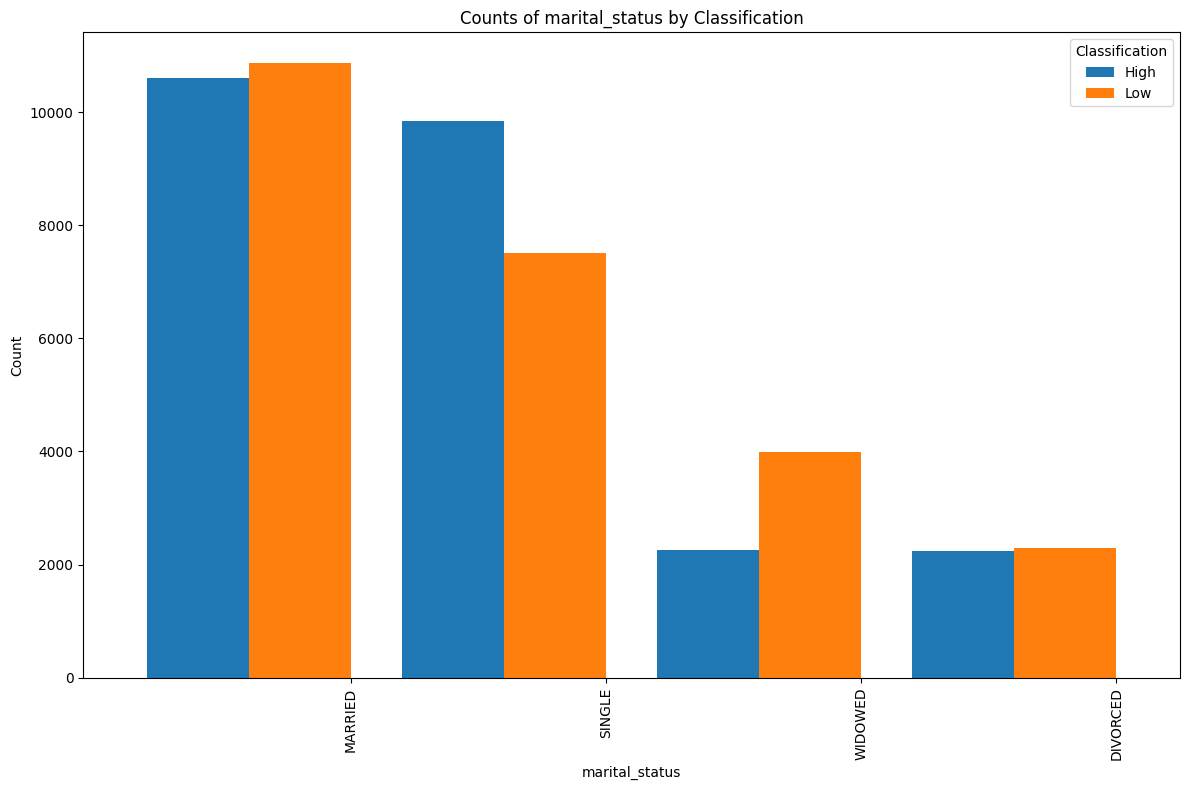

<Figure size 1200x800 with 0 Axes>

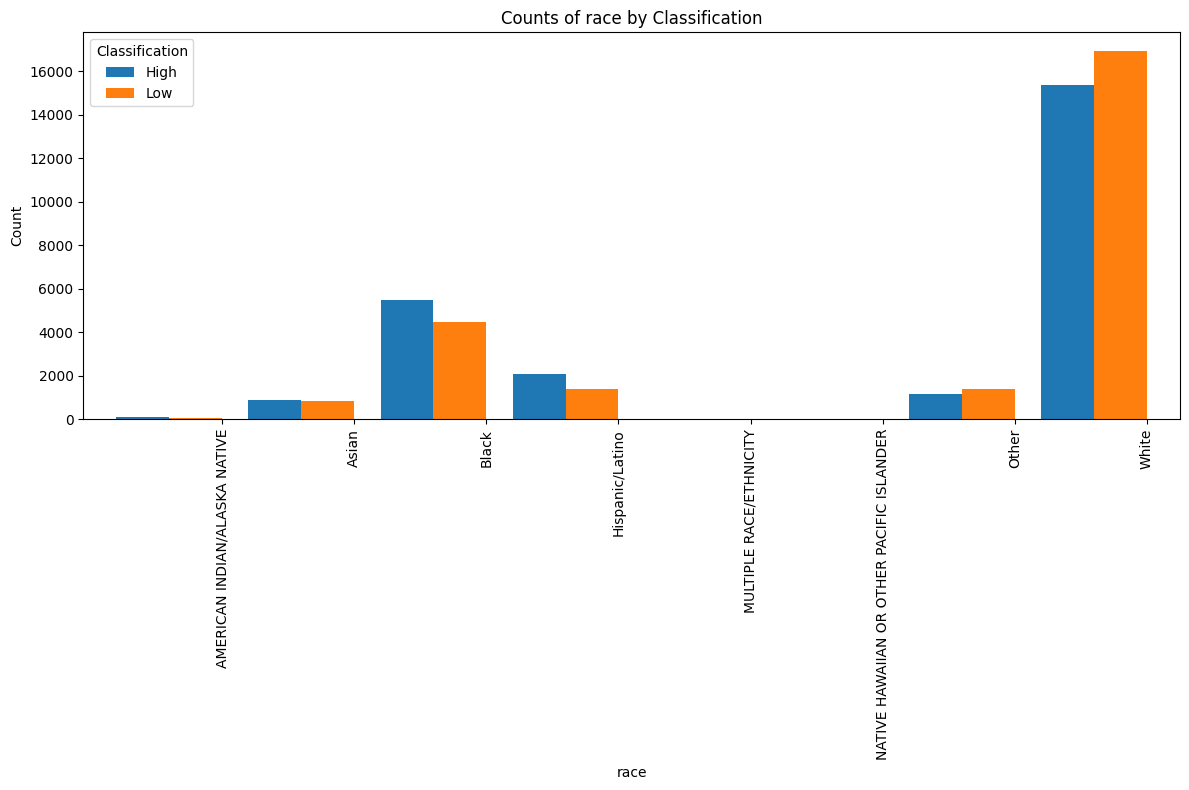

<Figure size 1200x800 with 0 Axes>

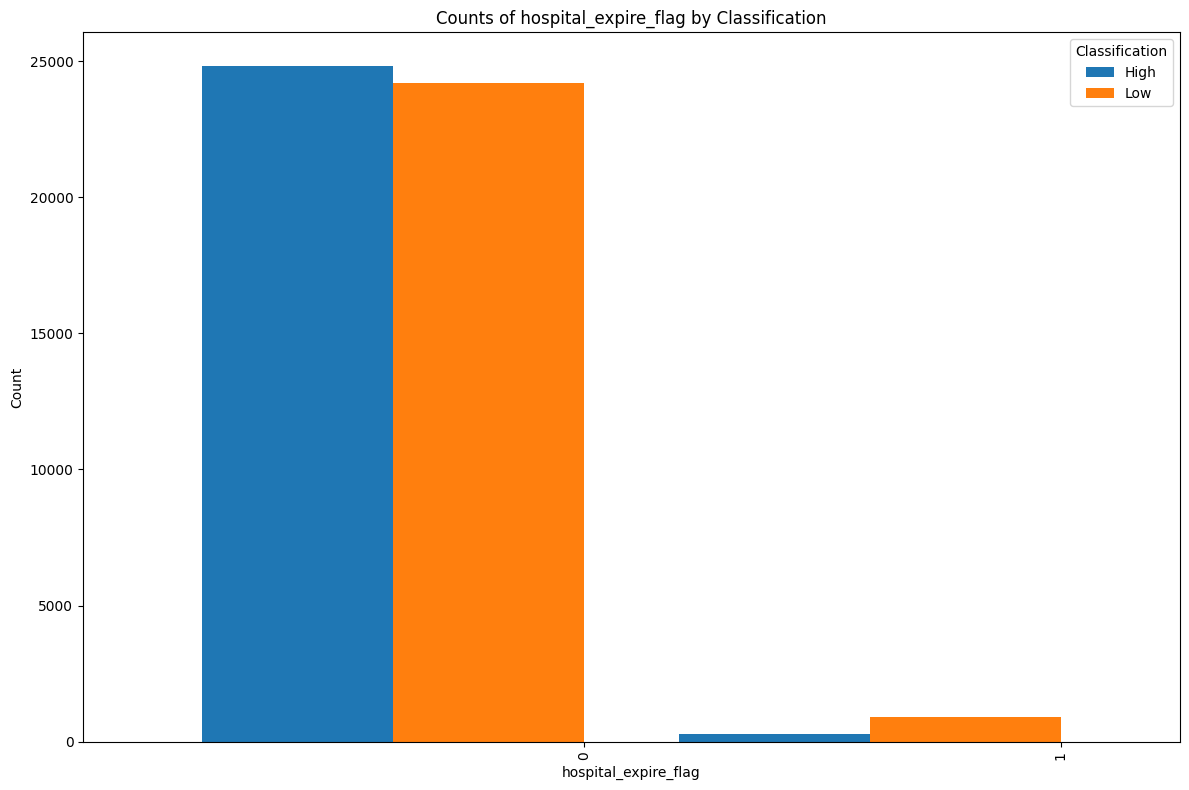

<Figure size 1200x800 with 0 Axes>

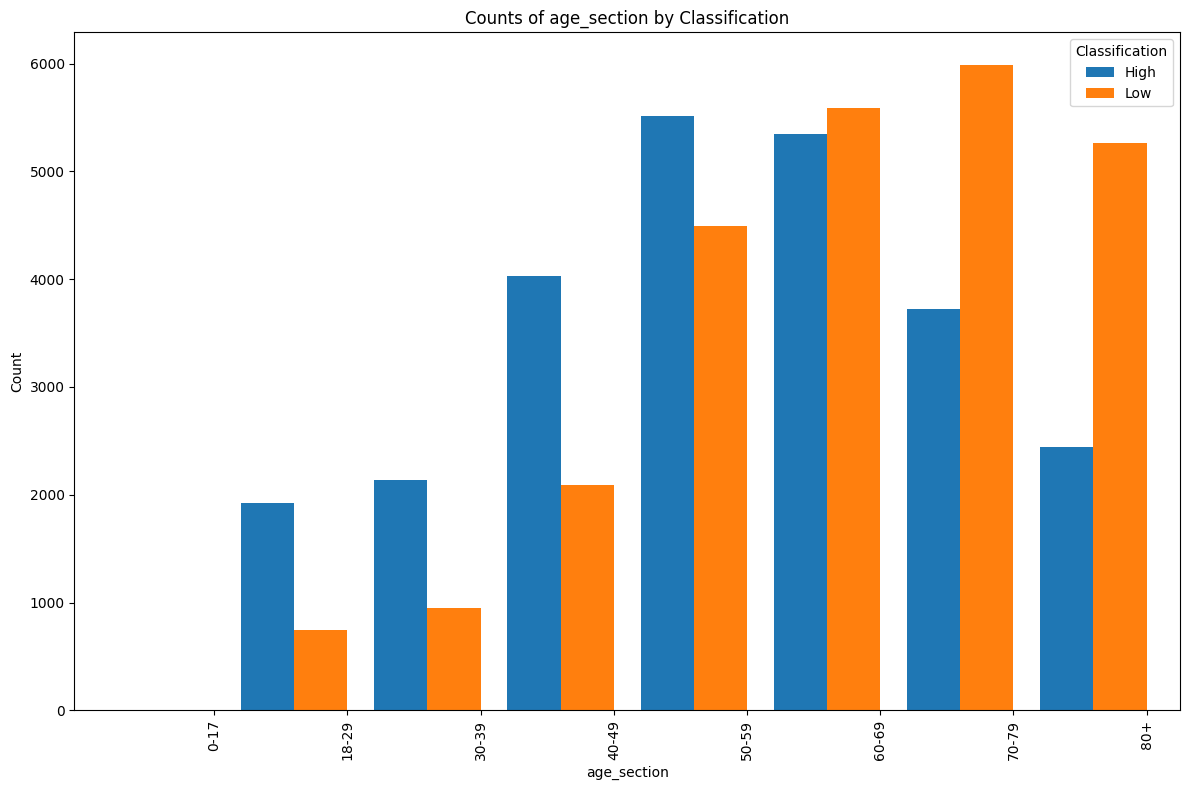

<Figure size 1200x800 with 0 Axes>

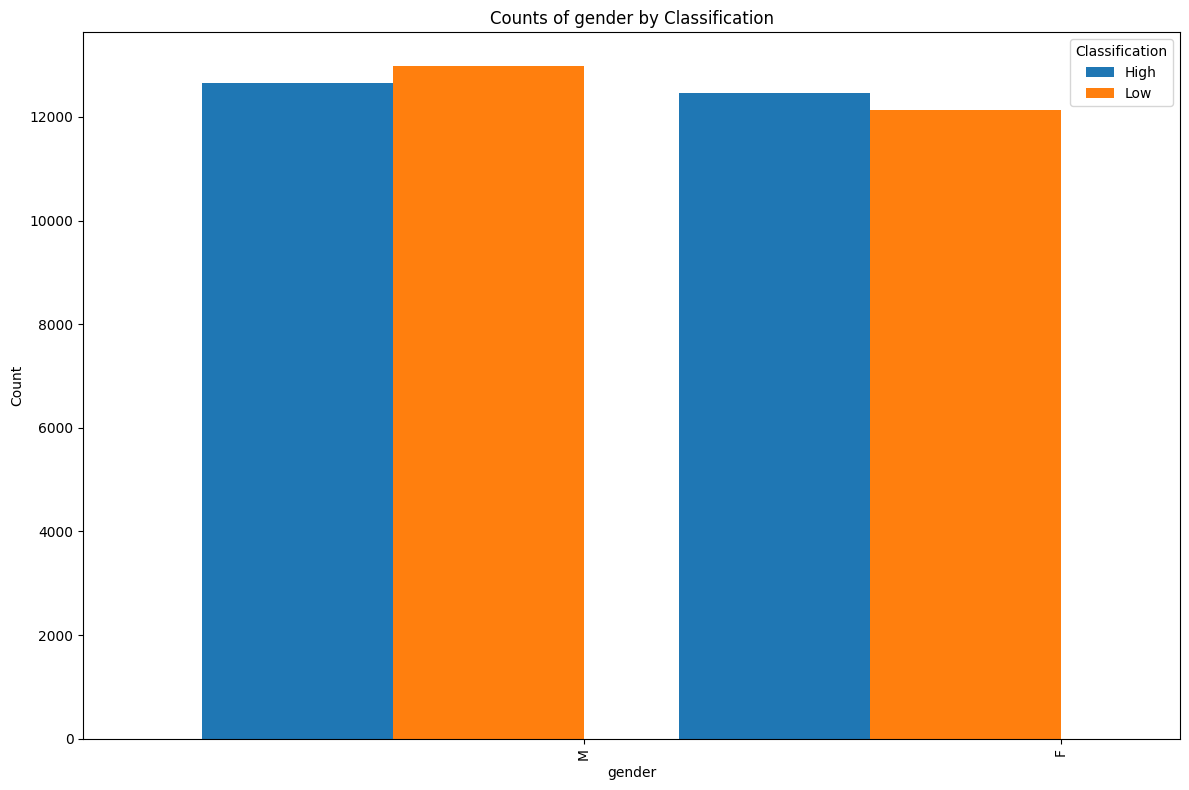

In [103]:
import matplotlib.pyplot as plt

variables = ['insurance', 'language',
             'marital_status', 'race', 'hospital_expire_flag', 'age_section', 'gender']

for var in variables:
    plt.figure(figsize=(12, 8))

    # Count occurrences for high and low classifications
    high_counts = df_high[var].value_counts()
    low_counts = df_low[var].value_counts()

    # Create a DataFrame for plotting
    counts_df = pd.DataFrame({
        'High': high_counts,
        'Low': low_counts
    }).fillna(0)  # Fill NaN values with 0

    # Plot grouped bar chart
    counts_df.plot(kind='bar', width=0.8, position=1, figsize=(12, 8))

    plt.title(f'Counts of {var} by Classification')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title='Classification')
    plt.tight_layout()

    # Save or show the plot
    plt.show()


In [72]:
df.columns

Index(['dicom_id', 'subject_id', 'cxr_notes', 'insurance', 'language',
       'marital_status', 'race', 'hospital_expire_flag', 'age', 'gender',
       'pred_0', 'label_0', 'pred_1', 'label_1', 'pred_2', 'label_2', 'pred_3',
       'label_3', 'pred_4', 'label_4', 'pred_5', 'label_5', 'diff_0', 'diff_1',
       'diff_2', 'diff_3', 'diff_4', 'diff_5', 'avg_difference',
       'classification', 'age_section'],
      dtype='object')

In [73]:
df_clusterable = df[['insurance','language','marital_status','race','hospital_expire_flag','age','gender','classification']]

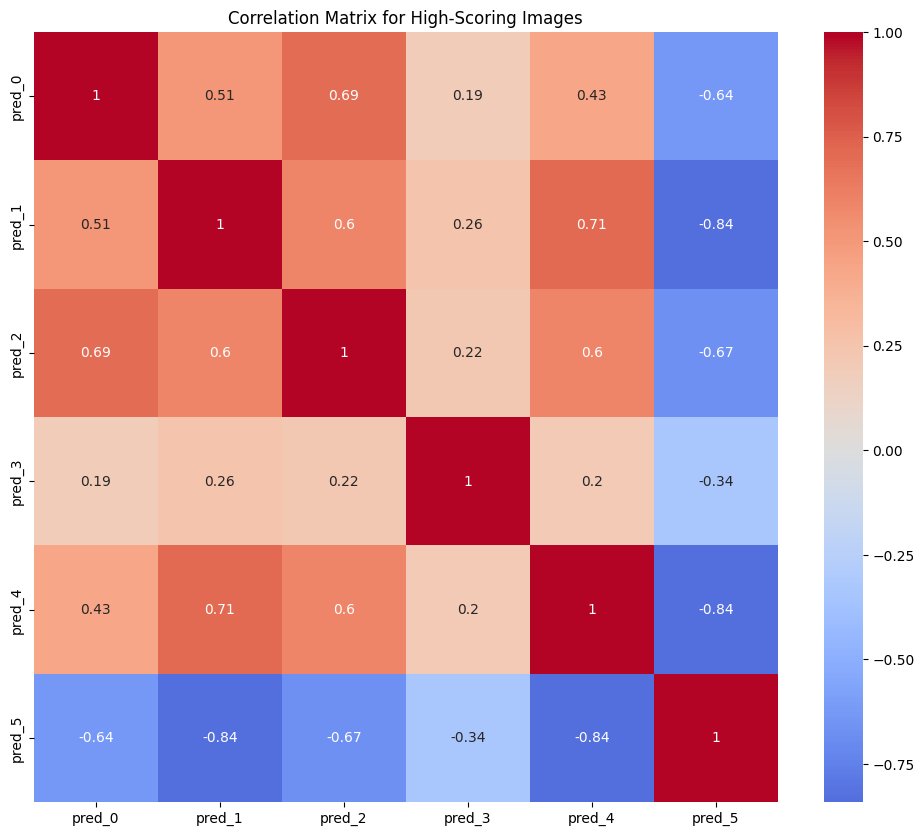

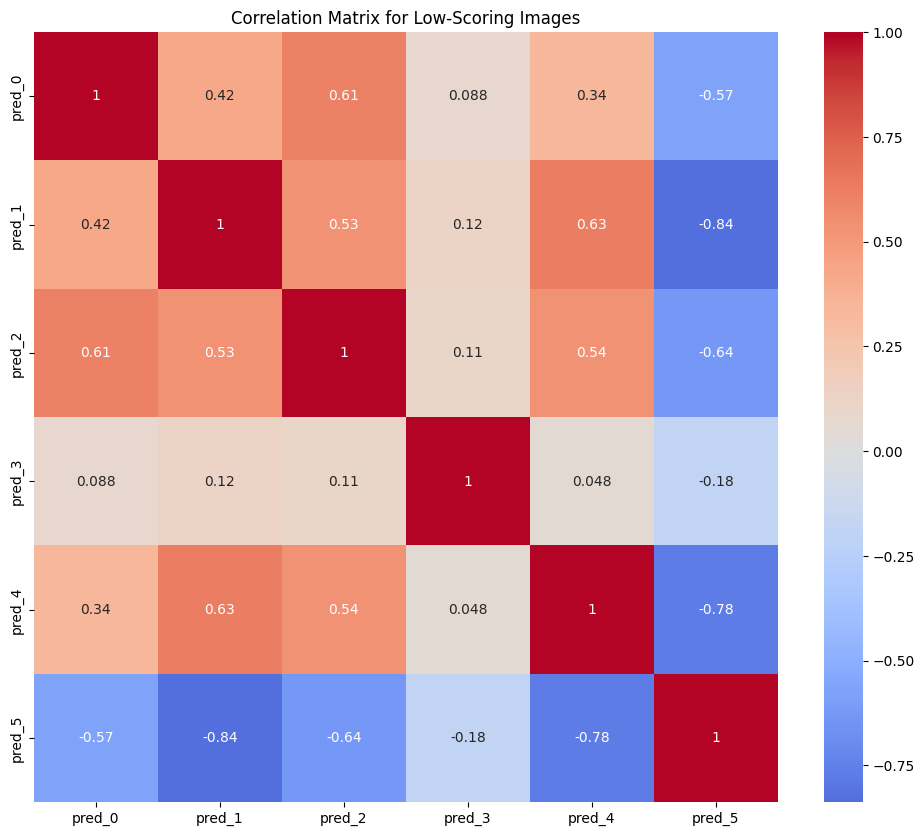

In [116]:
import seaborn as sns
# Load the full data into a DataFrame
# Correlation matrix for high-scoring images
high_scoring_df = df[df['classification'] == 'high-scoring']
low_scoring_df = df[df['classification'] == 'low-scoring']

# Compute correlations
high_scoring_corr = high_scoring_df[['pred_0', 'pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5',]].corr(method='spearman')
low_scoring_corr = low_scoring_df[['pred_0', 'pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5',]].corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(high_scoring_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for High-Scoring Images')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(low_scoring_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Low-Scoring Images')
plt.show()



In [106]:
columns_to_encode = ['insurance', 'language', 'marital_status', 'race', 'gender']

# Create a dictionary to hold label encoders for each column
label_encoders = {}

# Encode string columns
for column in columns_to_encode:
    le = LabelEncoder()
    combined_df[column] = le.fit_transform(combined_df[column])
    label_encoders[column] = le

# Split the combined DataFrame back into high_scoring_df and low_scoring_df
high_scoring_df_encoded = combined_df[combined_df['classification'] == 'high-scoring']
low_scoring_df_encoded = combined_df[combined_df['classification'] == 'low-scoring']


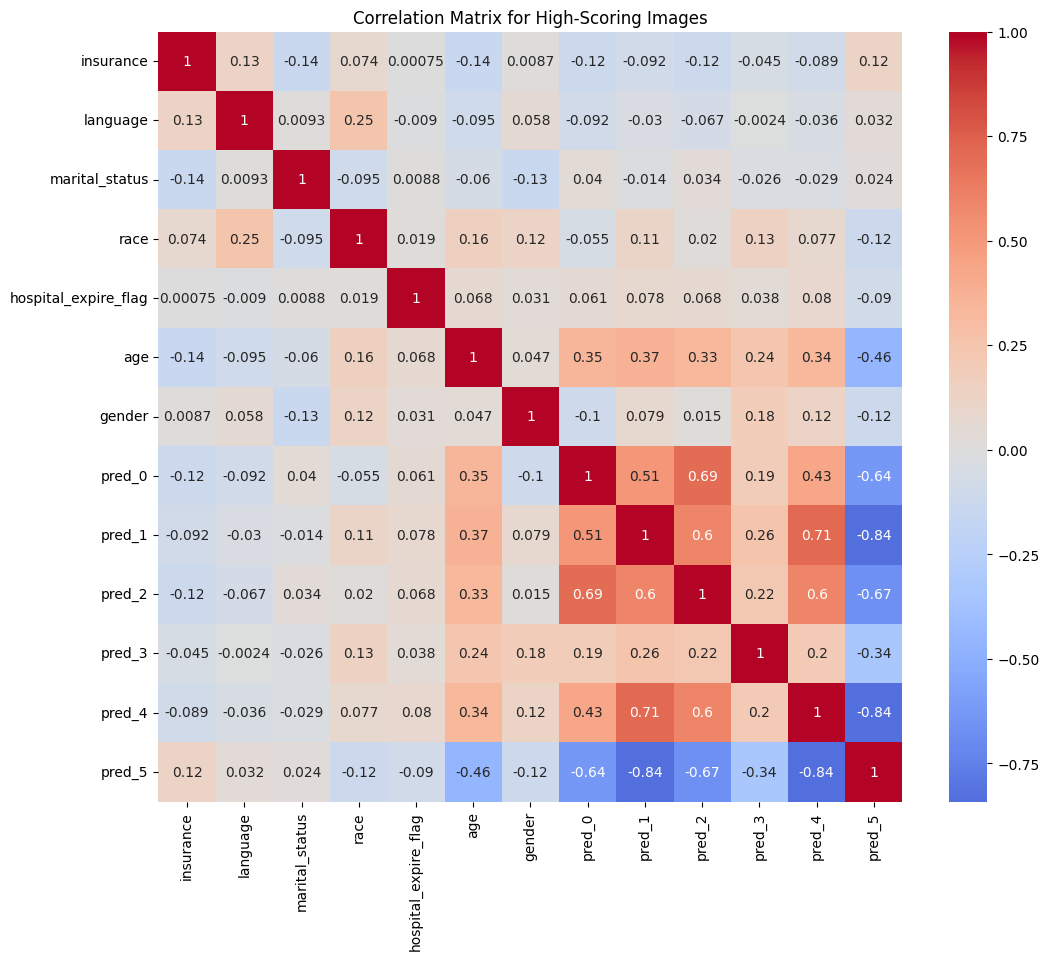

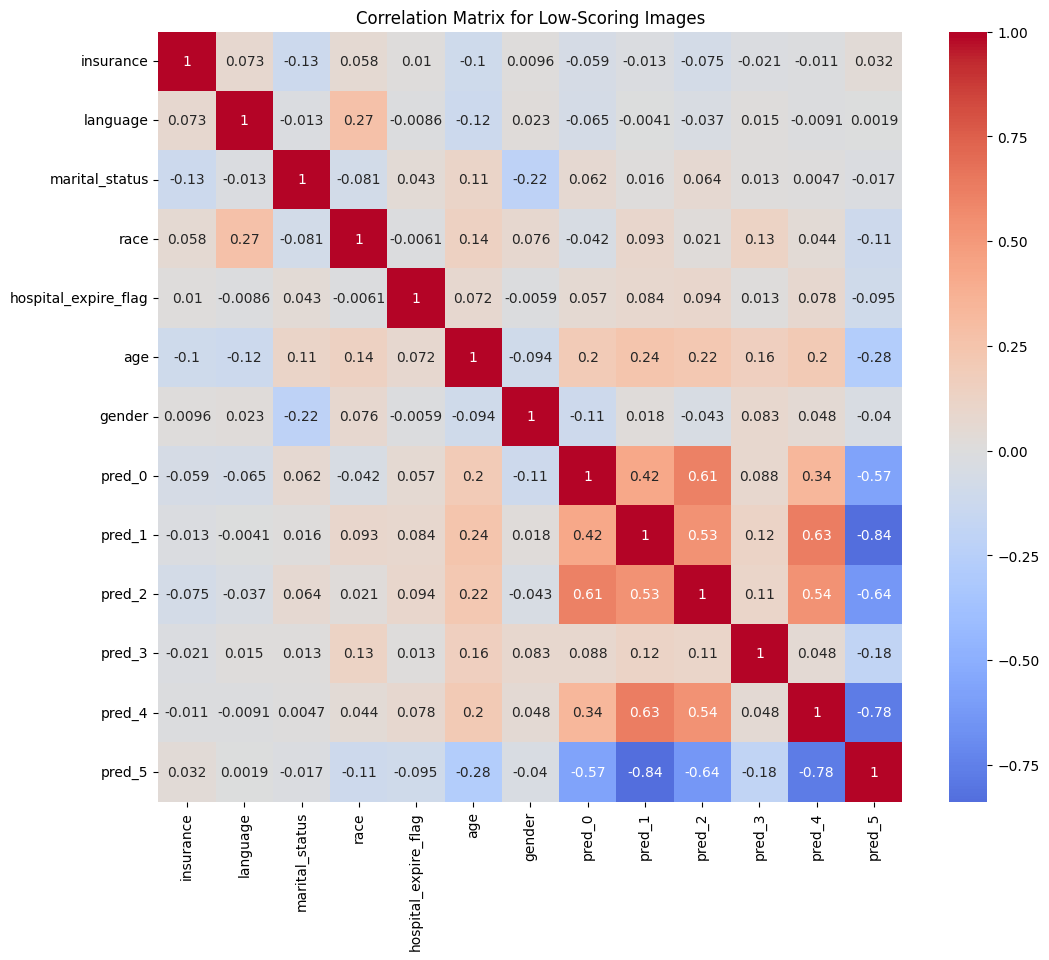

In [118]:
import seaborn as sns

# Compute correlations
high_scoring_corr = high_scoring_df_encoded[['insurance', 'language',
       'marital_status', 'race', 'hospital_expire_flag', 'age', 'gender',
       'pred_0', 'pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5']].corr(method='spearman')
low_scoring_corr = low_scoring_df_encoded[['insurance', 'language',
       'marital_status', 'race', 'hospital_expire_flag', 'age', 'gender',
       'pred_0',  'pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5']].corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(high_scoring_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for High-Scoring Images')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(low_scoring_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Low-Scoring Images')
plt.show()



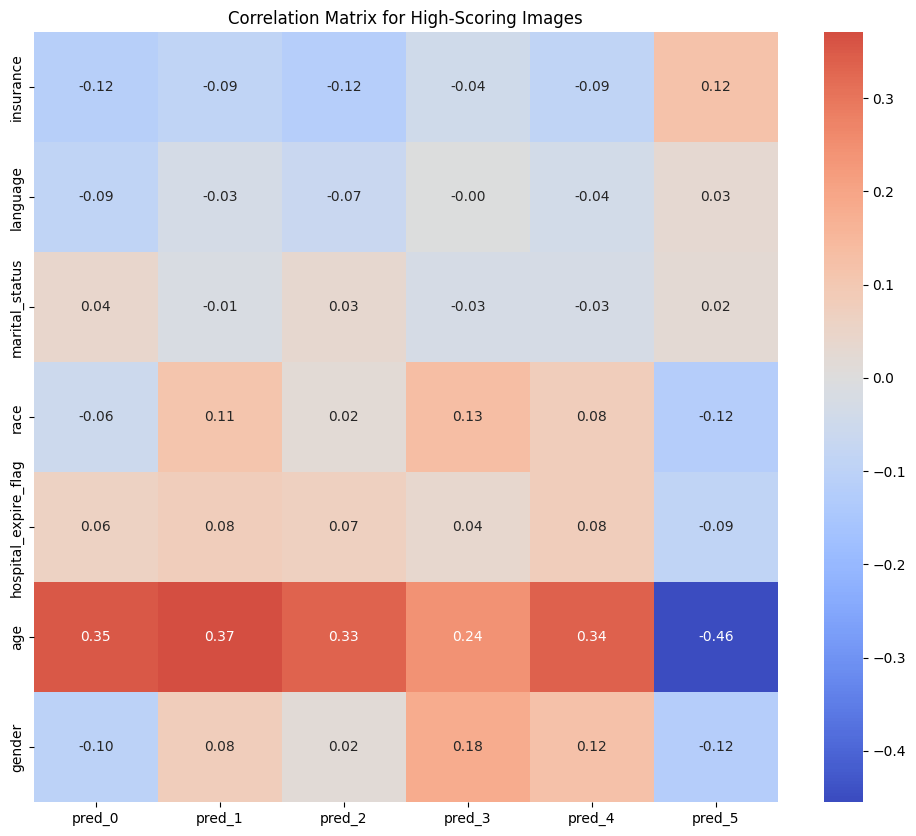

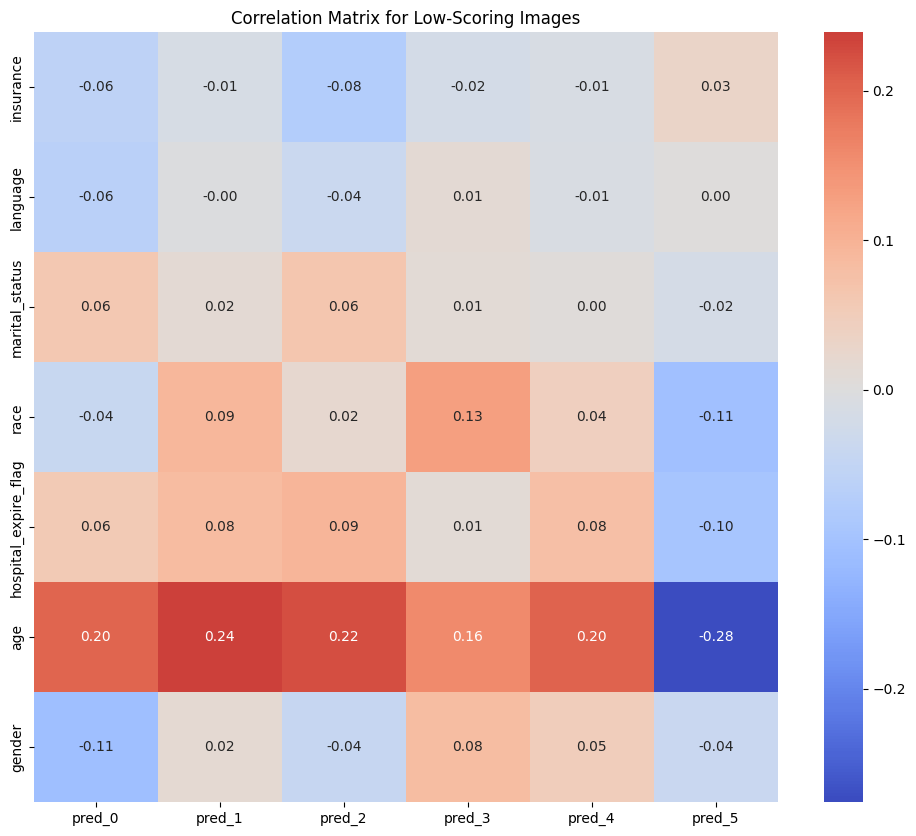

In [120]:
high_scoring_corr = high_scoring_df_encoded[['insurance', 'language',
                                             'marital_status', 'race',
                                             'hospital_expire_flag', 'age',
                                             'gender']].join(
    high_scoring_df_encoded[['pred_0', 'pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5']]
).corr(method='spearman')

low_scoring_corr = low_scoring_df_encoded[['insurance', 'language',
                                           'marital_status', 'race',
                                           'hospital_expire_flag', 'age',
                                           'gender']].join(
    low_scoring_df_encoded[['pred_0', 'pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5']]
).corr(method='spearman')

# Extract the correlation matrices for desired axes
high_scoring_corr_subset = high_scoring_corr.loc[
    ['insurance', 'language', 'marital_status', 'race', 'hospital_expire_flag', 'age', 'gender'],
    ['pred_0', 'pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5']
]

low_scoring_corr_subset = low_scoring_corr.loc[
    ['insurance', 'language', 'marital_status', 'race', 'hospital_expire_flag', 'age', 'gender'],
    ['pred_0', 'pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5']
]

# Plot the correlation matrix for high scoring
plt.figure(figsize=(12, 10))
sns.heatmap(high_scoring_corr_subset, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix for High-Scoring Images')
plt.show()

# Plot the correlation matrix for low scoring
plt.figure(figsize=(12, 10))
sns.heatmap(low_scoring_corr_subset, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix for Low-Scoring Images')
plt.show()

High-Scoring Average Error: 0.1165530551404989
Low-Scoring Average Error: 0.3028007903403631


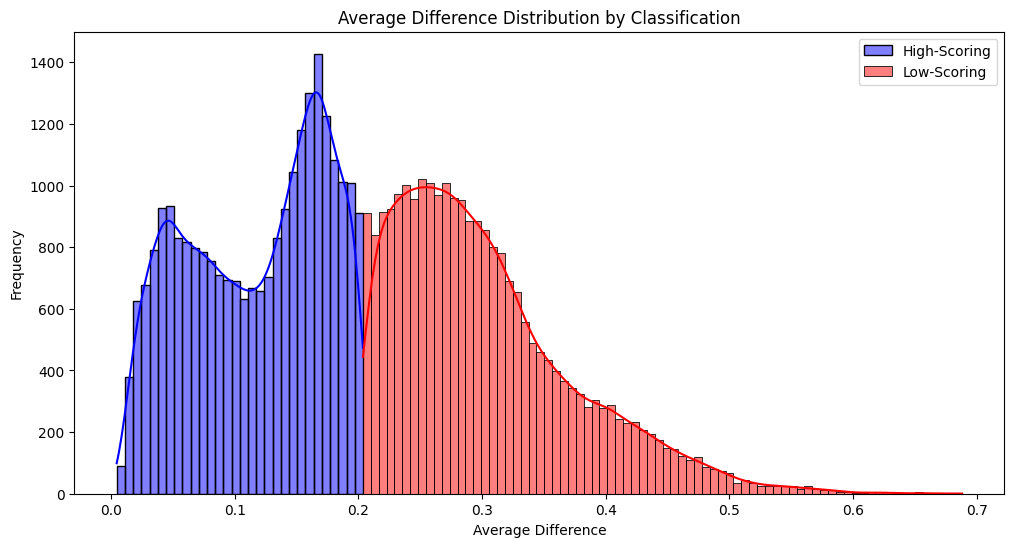

In [80]:
# Analyze differences in average prediction errors between high and low-scoring groups
high_scoring_avg_error = high_scoring_df['avg_difference'].mean()
low_scoring_avg_error = low_scoring_df['avg_difference'].mean()

print(f"High-Scoring Average Error: {high_scoring_avg_error}")
print(f"Low-Scoring Average Error: {low_scoring_avg_error}")

# Compare the distributions of average errors
plt.figure(figsize=(12, 6))
sns.histplot(high_scoring_df['avg_difference'], label='High-Scoring', color='blue', kde=True)
sns.histplot(low_scoring_df['avg_difference'], label='Low-Scoring', color='red', kde=True)
plt.xlabel('Average Difference')
plt.ylabel('Frequency')
plt.title('Average Difference Distribution by Classification')
plt.legend()
plt.show()


In [81]:
df_clusterable

,insurance,language,marital_status,race,hospital_expire_flag,age,gender,classification
0,1,1,3,5,0,70,1,high-scoring
1,2,1,1,5,0,47,1,low-scoring
2,2,1,1,5,0,46,1,low-scoring
3,1,0,4,5,0,88,0,low-scoring
4,1,1,3,4,1,73,0,low-scoring
...,...,...,...,...,...,...,...,...
50221,0,1,3,5,0,63,1,low-scoring
50222,1,1,3,5,0,72,1,high-scoring
50223,2,1,4,5,0,88,0,low-scoring
50224,0,1,3,6,0,43,1,high-scoring


In [143]:
df

,dicom_id,subject_id,cxr_notes,insurance,language,marital_status,race,hospital_expire_flag,age,gender,...,label_5,diff_0,diff_1,diff_2,diff_3,diff_4,diff_5,avg_difference,classification,pred_sum
0,00010785-aefa6d86-8d00afab-09e76c6a-edb6b458,18778431,FINAL REPORT\...,Medicare,ENGLISH,SINGLE,White,0,70,M,...,1,0.036442,0.006518,0.000579,0.001776,0.070622,0.080007,0.032657,high-scoring,1.035931
1,0002ba95-e4325b54-a0e16b3b-3cf6c9d4-1b1c1910,18958209,FINAL REPORT\...,Other,ENGLISH,MARRIED,White,0,47,M,...,0,0.895886,0.008693,0.002272,0.006564,0.801882,0.519948,0.372541,low-scoring,0.839709
2,00039aac-942aea85-a4f7cd1c-faed6733-c8701b02,10900906,FINAL REPORT\...,Other,ENGLISH,MARRIED,White,0,46,M,...,0,0.073242,0.010335,0.002279,0.003406,0.883868,0.743205,0.286056,low-scoring,0.948599
3,0005ad61-eaa2d768-c8aff20f-dc56514a-47de997c,11888239,FINAL REPORT\...,Medicare,?,WIDOWED,White,0,88,F,...,0,0.371582,0.450337,0.122760,0.019159,0.317923,0.194603,0.246061,low-scoring,1.476364
4,0006a816-5140e307-815c7b9f-4856cbc6-670b7e6d,14533062,FINAL REPORT\...,Medicare,ENGLISH,SINGLE,Other,1,73,F,...,0,0.314317,0.827540,0.013725,0.005869,0.274945,0.287542,0.287323,low-scoring,1.068859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50221,fff85c15-2446d444-26d09a19-cab887d9-adec07c3,15283676,CLINICAL INFORMATION & QUESTIONS TO BE ANSWER...,Medicaid,ENGLISH,SINGLE,White,0,63,M,...,1,0.130908,0.207459,0.036986,0.009927,0.554218,0.876878,0.302729,low-scoring,1.062619
50222,fffa7649-9dbf3371-c8083229-5e6906c0-24eac216,19512875,FINAL REPORT\...,Medicare,ENGLISH,SINGLE,White,0,72,M,...,0,0.031670,0.034655,0.001166,0.006678,0.629591,0.274814,0.163096,high-scoring,0.719392
50223,fffb28b4-1baa9271-538012ae-89dcdaab-a2d84281,16245569,FINAL REPORT\...,Other,ENGLISH,WIDOWED,White,0,88,F,...,0,0.658828,0.268537,0.044125,0.008737,0.605399,0.025063,0.268448,low-scoring,2.073614
50224,fffd4d33-422d4d5b-7c09efc3-43832cf6-87c52a7f,16531888,FINAL REPORT\...,Medicaid,ENGLISH,SINGLE,Black,0,43,M,...,1,0.013806,0.001121,0.000026,0.000772,0.035011,0.035759,0.014416,high-scoring,1.014977


In [146]:
threshold

0.20366934384583335

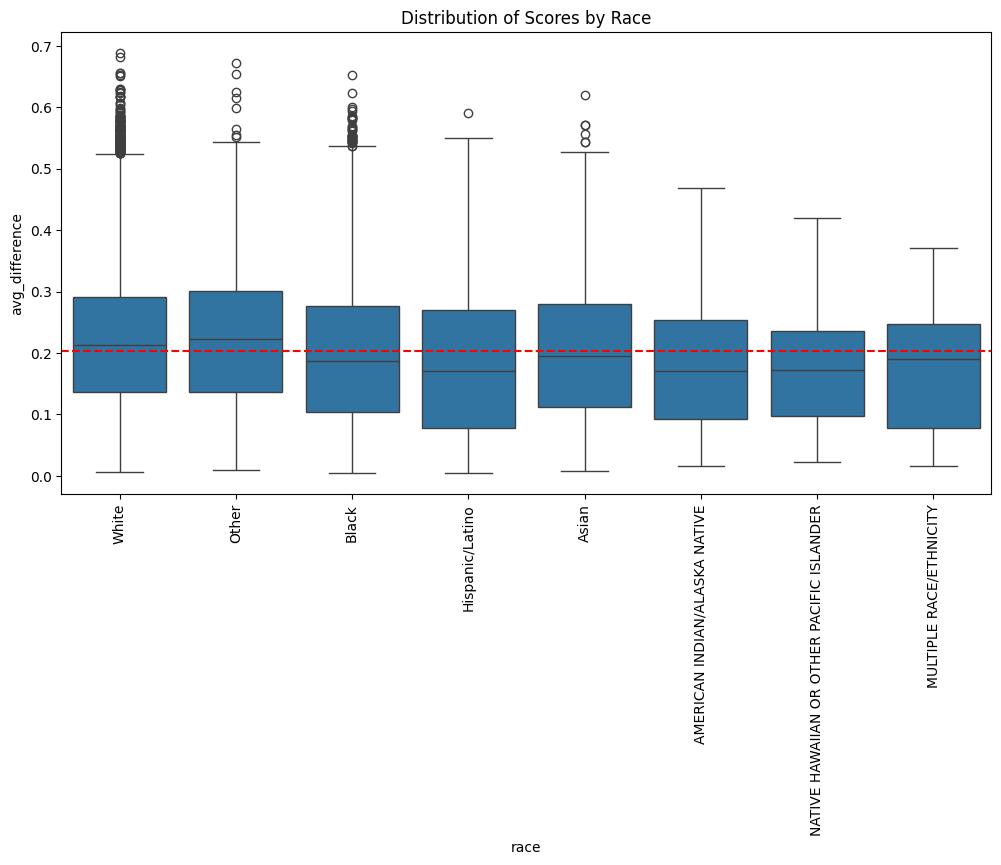

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.boxplot(x='race', y='avg_difference', data=df)
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold ({threshold})')
plt.title('Distribution of Scores by Race')
plt.xticks(rotation=90)
plt.show()


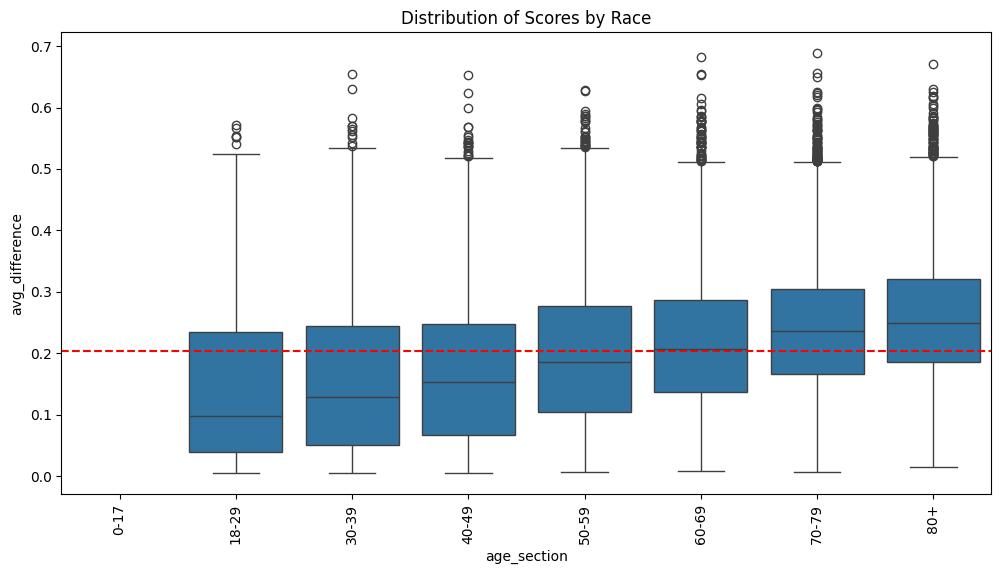

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.boxplot(x='age_section', y='avg_difference', data=df)
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold ({threshold})')
plt.title('Distribution of Scores by Race')
plt.xticks(rotation=90)
plt.show()


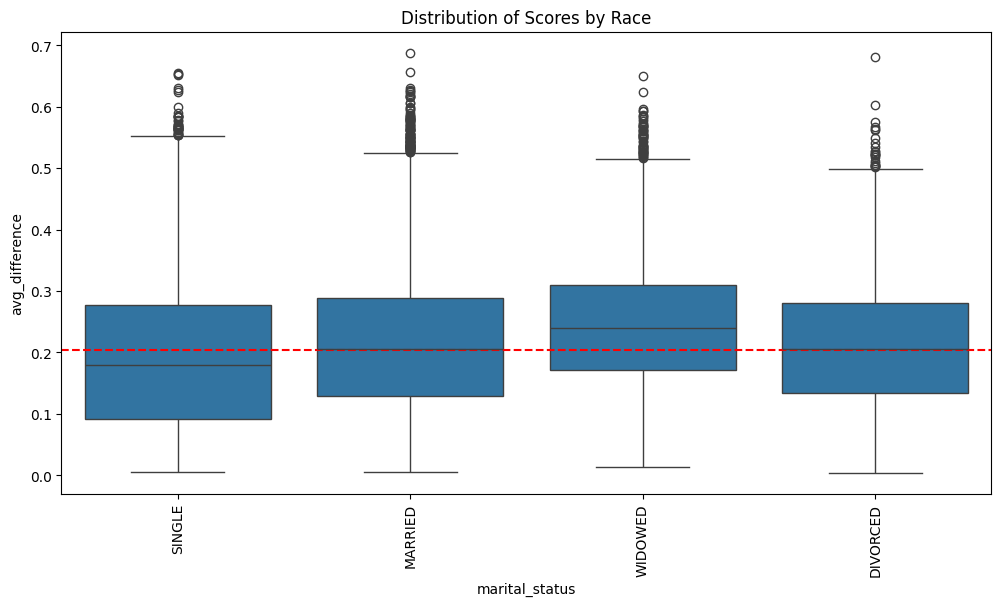

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.boxplot(x='marital_status', y='avg_difference', data=df)
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold ({threshold})')
plt.title('Distribution of Scores by Race')
plt.xticks(rotation=90)
plt.show()


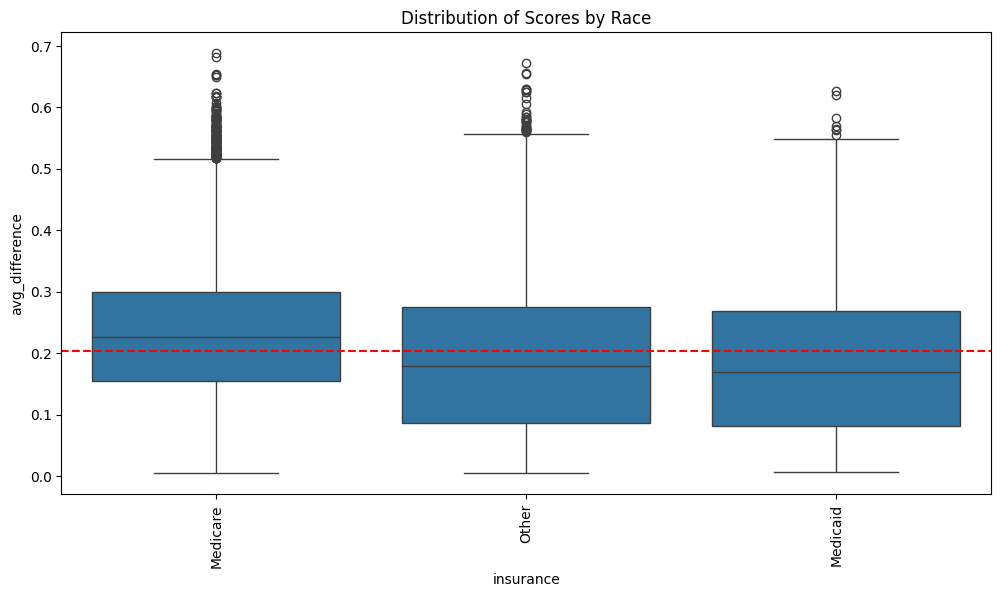

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.boxplot(x='insurance', y='avg_difference', data=df)
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold ({threshold})')
plt.title('Distribution of Scores by Race')
plt.xticks(rotation=90)
plt.show()


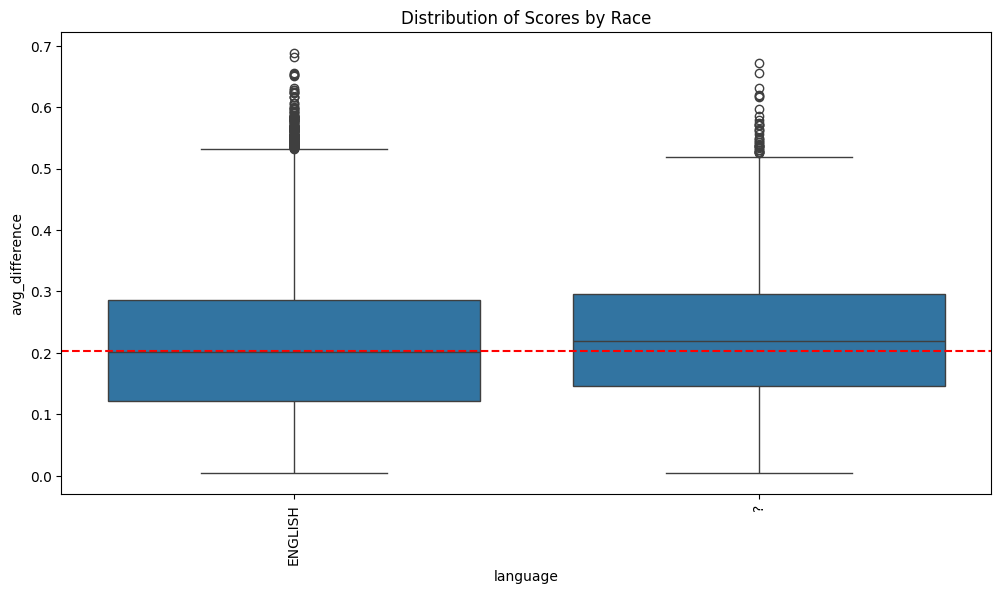

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.boxplot(x='language', y='avg_difference', data=df)
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold ({threshold})')
plt.title('Distribution of Scores by Race')
plt.xticks(rotation=90)
plt.show()


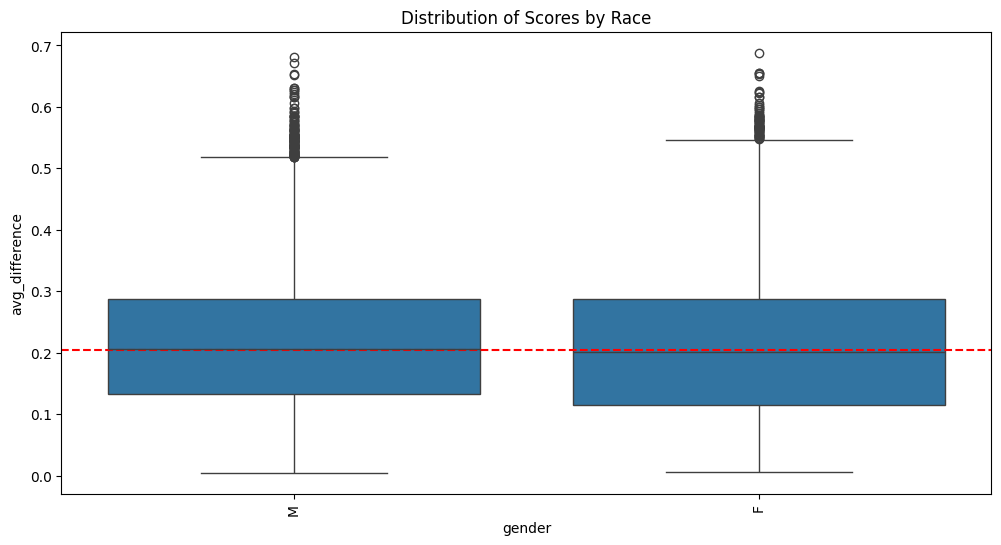

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='avg_difference', data=df)
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold ({threshold})')
plt.title('Distribution of Scores by Race')
plt.xticks(rotation=90)
plt.show()
